**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

In [1]:
#Install the necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


Firstly append dataframe.

In [25]:
# import data
data = pd.read_csv("column_3C_weka.csv")

Then examine the data set. We should get information about our data.

In [26]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [27]:
data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [28]:
data["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

Class column has two sample: Abnormal and Normal. We use binary classification.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


We don't need to cleaning data because samples full and types are float.

In [30]:
# create new two datas
H = data[data["class"] == "Hernia"]
N = data[data["class"] == "Normal"]
S = data[data["class"] == "Spondylolisthesis"]

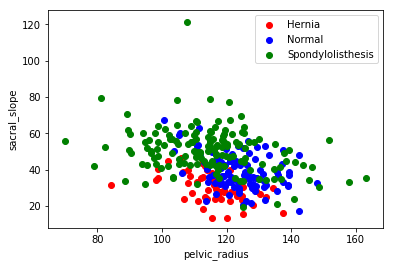

In [33]:
# visualize
plt.scatter(H.pelvic_radius,H.sacral_slope,color = "red",label = "Hernia")
plt.scatter(N.pelvic_radius,N.sacral_slope,color = "blue",label = "Normal")
plt.scatter(S.pelvic_radius,S.sacral_slope,color = "green",label = "Spondylolisthesis")
plt.xlabel("pelvic_radius")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()

Class column's type should be integer or categorical.

In [35]:
# class column's type change to integer.
data["class"] = data["class"].replace("Normal",1)
data["class"] = data["class"].replace("Hernia",2)
data["class"] = data["class"].replace("Spondylolisthesis",3)

data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,2
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,2
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,2
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,2
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,2


Let's crate x and y.

In [36]:
y = data["class"].values
x_data = data.loc[:,data.columns != 'class']

Normalization:
Rescaling data to have values between 0 and 1. This is usually called feature scaling. One possible formula to achieve this is: (x - min(x))/(max(x)-min(x))

In [37]:
# normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

We should split dataframe as train and test. Train part will learn and test part will prediction.

In [38]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

Let's create KNN model.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  #n_neighbors = k
knn.fit(x_train,y_train)  # the model is creating
knn.predict(x_test)  # prediction 

array([3, 2, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3, 2, 2, 3, 3, 1, 1, 3, 1,
       3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 2, 3, 3, 3, 1, 3, 2, 2, 3, 3,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3,
       1, 1, 2, 2, 3], dtype=int64)

How successful we estimate?

In [40]:
print("{} nn score:{}".format(3,knn.score(x_test,y_test)))

3 nn score:0.6989247311827957


What should be best successfully k value?

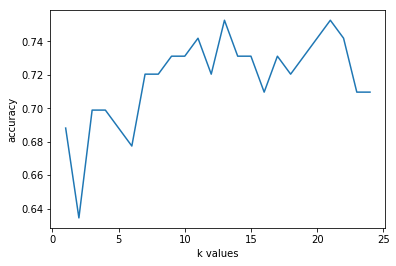

In [41]:
# find k value
score_list = []  # we store the values we find in this list.
for each in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
# visualize
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [42]:
#Finding best value of k for the best score
max(score_list)
max_index = score_list.index(max(score_list))

In [43]:
max_index

12

In [44]:
max(score_list)

0.7526881720430108